# Event-based Analitics

##  Integrated project 2

### Step 0. Intro and table of content

#### Table of contents

0. [Step 0. Intro and table of content](#introduction)


1. [Step 1. Open the data file and read the general information](#part1)
    - [Step 1: Conclusion](#introduction1)
    
2. [Step 2. Prepare the data for analysis](#part2)
    - [Part 1: Conclusion](#part21)  
    
3. [Step 3. Study and check the data](#part3)
    - [Step 3: Conclusion](#part31) 
    
4. [Step 4. Study the event funnel](#part4)
    - [Step 4: Conclusion](#part41) 
    
5. [Step 5. Study the results of the experiment](#part5)
    - [Step 5: Conclusion](#part51)  

6. [Step 6. General conclusion](#part6)
    

#### Intro 
<a class="anchor" id="introduction"></a>

We work at a startup that sells food products. We need to investigate user behavior for the company's app:  
- How users reach the purchase stage? 
- How many users actually make it to this stage? 
- How many get stuck at previous stages? Which stages in particular?

Also we are going to analyse the results of A/A/B test of new fonts in the company's app.  


## Step 1. Open the data file and read the general information

<a class="anchor" id="part1"></a>

In [1]:
#! pip install -q chart-studio
#! pip install --upgrade -q plotly

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
#import usaddress
#import plotly.graph_objects as go
from datetime import datetime
#import scipy as sc
#pd.set_option('max_colwidth', 400)
import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    data = pd.read_csv('logs_exp_us.csv', sep = '\\t', nrows=500)
except:
    data = pd.read_csv('/datasets/logs_exp_us.csv', sep = '\\t', nrows=500)

In [4]:
data.sample(10)

,EventName,DeviceIDHash,EventTimestamp,ExpId
315,MainScreenAppear,5496023611025522824,1564419063,246
480,OffersScreenAppear,32131536909829030,1564480165,247
105,MainScreenAppear,2088030388420733246,1564290297,247
89,CartScreenAppear,2793988848638831992,1564252141,247
461,CartScreenAppear,3603221798976493506,1564476014,246
52,OffersScreenAppear,1877880950237790633,1564217647,246
49,MainScreenAppear,4827775328614831155,1564217125,247
408,MainScreenAppear,4884527525445118462,1564465198,246
150,MainScreenAppear,8810941885921686538,1564320872,247
303,MainScreenAppear,2580943867406133933,1564416467,246


In [5]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
EventName         500 non-null object
DeviceIDHash      500 non-null int64
EventTimestamp    500 non-null int64
ExpId             500 non-null int64
dtypes: int64(3), object(1)
memory usage: 47.8 KB


We have a very few different options in columns _EventName_ and _ExpId_ so we can optimize the import. 
We are going also to rename columns to make futher coding a bit more convinient. 

In [6]:
try:
    df = pd.read_csv('logs_exp_us.csv', sep = '\\t', names = ['event', 'id', 'timest', 'exp'], header=0,
                      dtype={'event': 'category', 'exp': 'category'})
except:
     df = pd.read_csv('/datasets/logs_exp_us.csv', sep = '\\t', names = ['event', 'id', 'timest', 'exp'], header=0,
                      dtype={'event': 'category', 'exp': 'category'})

In [7]:
df.shape

(244126, 4)

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
event     244126 non-null category
id        244126 non-null int64
timest    244126 non-null int64
exp       244126 non-null category
dtypes: category(2), int64(2)
memory usage: 4.2 MB


In [9]:
df.head(10)

,event,id,timest,exp
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


In [10]:
df.tail()

,event,id,timest,exp
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246
244125,OffersScreenAppear,5746969938801999050,1565212517,246


### Step 1. Conclusion
<a class="anchor" id="part11"></a>

In this tiny step we just imported data to Jupiter Notebook using custom _sep_ parameter and renamed the columns in the dataset. 

## Step 2. Prepare the data for analysis
<a class="anchor" id="part2"></a>

In [11]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
event     244126 non-null category
id        244126 non-null int64
timest    244126 non-null int64
exp       244126 non-null category
dtypes: category(2), int64(2)
memory usage: 4.2 MB


We can see in the output above, that we don't have explicite missing values (all of 244126 entries in each column are non-null). 

We are going to convert unix-format timestamp to a human readable date and time according to our task. 

In [12]:
df['dt'] = pd.to_datetime(df['timest'], unit='s')

In [13]:
df['date'] = df['dt'].dt.date

In [14]:
df.tail()

,event,id,timest,exp,dt,date
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07
244125,OffersScreenAppear,5746969938801999050,1565212517,246,2019-08-07 21:15:17,2019-08-07


In [15]:
df.duplicated().sum()

413

In [16]:
print(df.info())
df = df.drop_duplicates().reset_index(drop=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
event     244126 non-null category
id        244126 non-null int64
timest    244126 non-null int64
exp       244126 non-null category
dt        244126 non-null datetime64[ns]
date      244126 non-null object
dtypes: category(2), datetime64[ns](1), int64(2), object(1)
memory usage: 7.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 6 columns):
event     243713 non-null category
id        243713 non-null int64
timest    243713 non-null int64
exp       243713 non-null category
dt        243713 non-null datetime64[ns]
date      243713 non-null object
dtypes: category(2), datetime64[ns](1), int64(2), object(1)
memory usage: 7.9+ MB
None


### Step 2. Conclusion
<a class="anchor" id="part21"></a>

In this small step we got rid of duplicates, saved timestamps in human readable format and created an additional column according to task. 

## Step 3. Study and check the data
<a class="anchor" id="part3"></a>

**_How many events are in the logs?_**

In [17]:
df.event.nunique()

5

In [18]:
len(df.event)

243713

We have 5 unique events in our dataset. (243713 non-unique entries.)

**_How many users are in the logs?_**

In [19]:
nusers = df.id.nunique()

If we assume, that each user has only one device, we have 7551 unique users. (Our assumption can not be 100% true, but we do not see any better options at this point.)

**_What's the average number of events per user?_**

In [20]:
df.groupby('id').nunique()['event'].mean()

2.6744802012978415

In [21]:
df.groupby('id').nunique()['event'].median()

3.0

We can say, 3 is an average number of events per user. 

**_What period of time does the data cover? Find the maximum and the minimum date. Plot a histogram by date and time._**

In [22]:
df['dt'].min()

Timestamp('2019-07-25 04:43:36')

In [23]:
df['dt'].max()

Timestamp('2019-08-07 21:15:17')

As we see in the output, we have events in out dataset, which occured during two weeks between 2019-07-25 04:43:36 and 2019-08-07 21:15:17

In [24]:
events_per_day = pd.pivot_table(df, index = ['date'], values = ['event'], aggfunc=['count']).reset_index()

events_per_day.columns = ['date','# of events']

events_per_day

,date,# of events
0,2019-07-25,9
1,2019-07-26,31
2,2019-07-27,55
3,2019-07-28,105
4,2019-07-29,184
5,2019-07-30,412
6,2019-07-31,2030
7,2019-08-01,36141
8,2019-08-02,35554
9,2019-08-03,33282


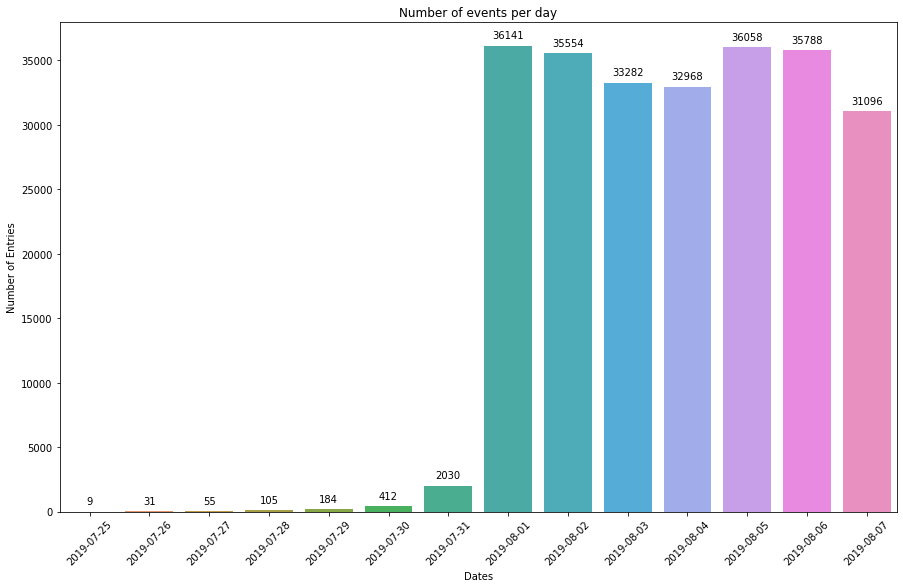

In [25]:
plt.figure(figsize=(15, 9))
ax = sns.barplot(data = events_per_day, x='date', y='# of events')

# Add titles and captions
plt.title('Number of events per day')
plt.xlabel('Dates')
plt.ylabel('Number of Entries')


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
# rotate x axis labels
for item in ax.get_xticklabels():
    item.set_rotation(45)

plt.show()

**_Can you be sure that you have equally complete data for the entire period? Older events could end up in some users' logs for technical reasons, and this could skew the overall picture. Find the moment at which the data starts to be complete and ignore the earlier section. What period does the data actually represent?_**

We can see something strange on the graph / in the output above: a very few events (max. 2k per day) during the last week of July and stable 31k+ events per day during the first week of August. 

How we can interpret this? 

One of explanations is that we have a mix of data in our dataset. Maybe the marketing team conducted a few tests at this period of time (with same group ids?) and by accident we received some of the data that we should not have received. 

One more explanation is that till the August the 1st there was some technical problem with data logging. 

Another explanation can be that the colleagues started some promotion or ad company in August. But this version does not explain such a the explosive growth in one day. 

Therefore we assume, we rather got some corrupted data. In real life we would talk to the collegues who provided the dataset. 
Here we just going to filter the suspicious data, as our tast suggests. 

But at first we want to check, how many entries we have in each of the groups in our A/A/B test. We are going to use this information later. 

In [26]:
df.exp.unique()

[246, 248, 247]
Categories (3, object): [246, 248, 247]

In [27]:
g246 = len(df[df['exp'].isin(['246'])])

In [28]:
g247 = len(df[df['exp'].isin(['247'])])

In [29]:
g248 = len(df[df['exp'].isin(['248'])])

And now we can start filter our data. 

In [30]:
df.shape

(243713, 6)

In [31]:
date = pd.to_datetime("2019-08-01").date()

df = df[df['date'] >= date]

In [32]:
df.shape

(240887, 6)

In [33]:
df[df['date'] == date].head()

,event,id,timest,exp,dt,date
2826,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2827,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2828,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2829,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2830,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01


It seems, that we successfully filtered 2826 rows of suspicious data from the July. 

Let's check, with the size of three experimantal groups.

**_Make sure you have users from all three experimental groups._**

In [34]:
g246_filtered = len(df[df['exp'].isin(['246'])])

g246_filtered / g246 * 100

98.90373031017323

In [35]:
g247_filtered = len(df[df['exp'].isin(['247'])])

g247_filtered / g247 * 100

98.8094932649134

In [36]:
g248_filtered = len(df[df['exp'].isin(['248'])])

g248_filtered / g248 * 100

98.80932906452291

Each group has became smaller, so it seems, that it is all right and we don't need to do something else.

**_Did you lose many events and users when excluding the older data?_**

In [37]:
df.event.nunique()

5

In [38]:
df.id.nunique() / nusers * 100

99.77486425638989

We still have 5 unique events and only 17 users less after filtering. 

### Step 3. Conclusion
<a class="anchor" id="part31"></a>

In this step we deeply dived into our data, checked it's consistence and credibility and mercilessly got rid of all unthrustworthy data. 

## Step 4. Study the event funnel
<a class="anchor" id="part4"></a>

**_See what events are in the logs and their frequency of occurrence. Sort them by frequency._**

In [39]:
by_events = pd.pivot_table(df, index = ['event'], values =['dt'], aggfunc=['nunique'])

In [45]:
by_events.reset_index()

,event,count,x
0,CartScreenAppear,40208,1
1,MainScreenAppear,103628,1
2,OffersScreenAppear,43985,1
3,PaymentScreenSuccessful,32586,1
4,Tutorial,1005,1


In [46]:
by_events = by_events.sort_values(by='count', ascending = False)

Here we can already see the funnel: _*MainScreenAppear -> OffersScreenAppear ->CartScreenAppear -> PaymentScreenSuccessful.*_ 

_*Tutorial*_ data are obviousely irrelevant and can be dropped.  Or at least ignore it. 

**_Find the number of users who performed each of these actions. Sort the events by the number of users. Calculate the proportion of users who performed the action at least once._**

In [47]:
event_users = df.groupby('event')['id'].nunique().sort_values(ascending=False) 
event_users = event_users.reset_index()
event_users.columns = ['event_name', 'nuser_unique']
event_users['ratio'] = (event_users['nuser_unique'] / df.id.nunique()) * 100

In [48]:
event_users

,event_name,nuser_unique,ratio
0,MainScreenAppear,7419,98.473586
1,OffersScreenAppear,4593,60.963632
2,CartScreenAppear,3734,49.561986
3,PaymentScreenSuccessful,3539,46.973719
4,Tutorial,840,11.149456


The table above also looks like a kind of funnel. In the column _nuser_unique_ we can see the number of unique users who performed each of the actions. In the _ratio_ column are proportions of users who performed the action at least once. The fugures are relatively high, we can assume at this point, that our startup doing well :-)

**_In what order do you think the actions took place. Are all of them part of a single sequence? You don't need to take them into account when calculating the funnel._**

We mentioned the assumable order above: MainScreenAppear -> OffersScreenAppear -> CartScreenAppear -> PaymentScreenSuccessful.  
_Are all of them part of a single sequence?_ is a question, which requeres a knowledge, not an assumption. In real life it's pretty easy to get an answer from collegues, how know the real procedure. 

We  don't really know how the app works and if all of the actions are mandatory or user can choose a shortcut or another way. 

So we can not claim, that all of actions were part of single sequence in _all_ cases, but based on our general knowledge it may be correct for most of them.  

**_Use the event funnel to find the share of users that proceed from each stage to the next. (For instance, for the sequence of events A → B → C, calculate the ratio of users at stage B to the number of users at stage A and the ratio of users at stage C to the number at stage B.)_**

Let's create funnel of unique users for each event. 

In [49]:
event_users['pct_change'] = event_users['nuser_unique'].pct_change() * 100
event_users = event_users.replace(np.nan, 0)
event_users

,event_name,nuser_unique,ratio,pct_change
0,MainScreenAppear,7419,98.473586,0.000000
1,OffersScreenAppear,4593,60.963632,-38.091387
2,CartScreenAppear,3734,49.561986,-18.702373
3,PaymentScreenSuccessful,3539,46.973719,-5.222282
4,Tutorial,840,11.149456,-76.264481


**_At what stage do you lose the most users? What share of users make the entire journey from their first event to payment?_**

So we can extract from the table, that we lose the most users on the stage MainScreenAppear -> OffersScreenAppear. 

The share of users who make the entire journey from their first event to payment can be found in the table too, it's almost 47%. 

(We are still ignoring tutorial data as not relevant for order process.)

### Step 4. Conclusion
<a class="anchor" id="part41"></a>

During this step we ordered the stages, build the event funnel and studied it. We founded out, that the most users are lost on the transition MainScreenAppear -> OffersScreenAppear. This information is important since it can be used to improve the busness processes. 

## Step 5. Study the results of the experiment
<a class="anchor" id="part5"></a>

It's not in the task, but we want to plot the funnel graph here: 

In [68]:
df.shape

(240887, 6)

In [67]:
df2 = df[df['event'] != 'Tutorial']

In [70]:
df2.shape

(239882, 6)

In [71]:
funnel_by_groups = []

# for every experiment group 
for i in df2.exp.unique():
    group = df2[df2.exp == i].groupby(['event', 'exp'])['id'].nunique().reset_index().sort_values(by='id', ascending=False)
    
    funnel_by_groups.append(group)

funnel_by_groups = pd.concat(funnel_by_groups)

fig = px.funnel(funnel_by_groups, x='id', y='event', color='exp', \
    labels = {'id': 'Nr. of users', 'event': 'Event'}, \
    title='Event funnel by a group: ')
fig.show()

Actually we can already claim, that the test showed that the font changing wasn't really successful: the figures of the testing group 248 where the users saw new fonts are a bit better, then the figures in the 2nd control group 247, but the smallest control group 246 makes the biggest number of succsessful payments (1200), as well as the minimal number of losing users on all stages. Therefore the necessity of changing the font has not been really demonstrated.

But we suppose, we also have to prove it statistically...

**_How many users are there in each group?_**

The group sizes on each step can be found on the graph above or in the table in the next cell. During the 1st stage it's  between 2450 and 2493. 

In [53]:
users_exp = df.groupby('exp')['id'].nunique().reset_index()
users_exp.columns = ['exp', 'unique_users']
users_exp

,exp,unique_users
0,246,2484
1,247,2513
2,248,2537


**_We have two control groups in the A/A test, where we check our mechanisms and calculations. See if there is a statistically significant difference between samples 246 and 247._**

The difference between 2450 and 2476 is a bit more than 1%. Thus if we are going to use alpha 0.05 there will be no statistical difference between samples 246 and 247. 

If we choose a strict alpha like 0.01, there will be a statistical difference between samples. 

But since we are not performing a sceintifical experiment, the alpha level 0.05 is sufficient.

Let's check our assumptions statistically with Python. 

H0 = "there is no statistically significant difference between samples 246 and 247". 

H1 = "there is a statistically significant difference between samples 246 and 247". 

In [54]:
df.exp = df.exp.astype('int16')

In [55]:
groups = df.pivot_table(index='event', values='id', columns='exp', aggfunc=lambda x: x.nunique()).reset_index()

groups

exp,event,246,247,248
0,CartScreenAppear,1266,1238,1230
1,MainScreenAppear,2450,2476,2493
2,OffersScreenAppear,1542,1520,1531
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,279


In [56]:
def check_hypothesis(group1, group2, alpha):

    for event in groups.event.unique():

        # define successes 
        successes1 = groups[groups.event == event][group1].iloc[0]
        successes2 = groups[groups.event == event][group2].iloc[0]

        # define trials
        trials1 = df[df.exp == group1]['id'].nunique()
        trials2 = df[df.exp == group2]['id'].nunique()

        # proportion for success in group 1
        p1 = successes1 / trials1

        # proportion for success in group 2
        p2 = successes2 / trials2

        # proportion in a combined dataset
        p_combined = (successes1 + successes2) / (trials1 + trials2)

        # define difference and z value
        difference = p1 - p2
        z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

        # calculate distribution
        distr = stats.norm(0,1)

        # calculate p_value
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('p_value: ', p_value)
        if (p_value < alpha):
            print("Reject H0 for",event, 'and groups ',group1,' and ', group2, '\n')
        else:
            print("Fail to Reject H0 for", event,'and groups ',group1,' and ', group2, '\n')

In [57]:
check_hypothesis(246, 247, 0.05)

p_value:  0.22883372237997213
Fail to Reject H0 for CartScreenAppear and groups  246  and  247 

p_value:  0.7570597232046099
Fail to Reject H0 for MainScreenAppear and groups  246  and  247 

p_value:  0.2480954578522181
Fail to Reject H0 for OffersScreenAppear and groups  246  and  247 

p_value:  0.11456679313141849
Fail to Reject H0 for PaymentScreenSuccessful and groups  246  and  247 

p_value:  0.9376996189257114
Fail to Reject H0 for Tutorial and groups  246  and  247 



Thus our assumtions were correct, there was no no statistically significant difference between samples 246 and 247 on all stages. Users were divided in testing groups correctly. 

**_Select the most popular event. In each of the control groups, find the number of users who performed this action. Find their share. Check whether the difference between the groups is statistically significant. Repeat the procedure for all other events (it will save time if you create a special function for this test). Can you confirm that the groups were split properly?_**

In [58]:

main_groups = groups[groups['event'] == 'MainScreenAppear']
main_groups.columns = ['event_name', '246_performed', '247_performed', '248_performed']

# calculate share 
main_groups['246_share'] = main_groups['246_performed'] / users_exp.loc[0,'unique_users'] * 100
main_groups['247_share'] = main_groups['247_performed'] / users_exp.loc[1,'unique_users'] * 100
main_groups['248_share'] = main_groups['248_performed'] / users_exp.loc[2,'unique_users'] * 100

display(main_groups)

,event_name,246_performed,247_performed,248_performed,246_share,247_share,248_share
1,MainScreenAppear,2450,2476,2493,98.63124,98.527656,98.265668


The most popular event is obviouse the main screen appearing: for each group it is more than 98%. 

We have checked the statistically significant difference between the groups 246 and 247 above. Let's check other group combinations. (H0 and H1 are as above.)

In [59]:
check_hypothesis(247, 248, 0.05)

p_value:  0.5786197879539783
Fail to Reject H0 for CartScreenAppear and groups  247  and  248 

p_value:  0.4587053616621515
Fail to Reject H0 for MainScreenAppear and groups  247  and  248 

p_value:  0.9197817830592261
Fail to Reject H0 for OffersScreenAppear and groups  247  and  248 

p_value:  0.7373415053803964
Fail to Reject H0 for PaymentScreenSuccessful and groups  247  and  248 

p_value:  0.765323922474501
Fail to Reject H0 for Tutorial and groups  247  and  248 



In [60]:
check_hypothesis(246, 248, 0.05)

p_value:  0.07842923237520116
Fail to Reject H0 for CartScreenAppear and groups  246  and  248 

p_value:  0.2949721933554552
Fail to Reject H0 for MainScreenAppear and groups  246  and  248 

p_value:  0.20836205402738917
Fail to Reject H0 for OffersScreenAppear and groups  246  and  248 

p_value:  0.2122553275697796
Fail to Reject H0 for PaymentScreenSuccessful and groups  246  and  248 

p_value:  0.8264294010087645
Fail to Reject H0 for Tutorial and groups  246  and  248 



Having 3 different experiment groups, it is important to ensure that that the results from these groups are based on fair numbers. In order to do so, we wanted to check if there is a statistically significant difference between all of the control groups. 

If we would find that there is a significant difference, then the control groups have not be split up equally and any results we deduct will not accurately represent the population. But according to outputs above it was not the case. 

We also can claime, that users were divided in all testing groups correctly. 

**_Do the same thing for the group with altered fonts. Compare the results with those of each of the control groups for each event in isolation. Compare the results with the combined results for the control groups. What conclusions can you draw from the experiment?_**

We have done the first part of the task above. Let's compare the results with the combined results for the control groups. Do do so, we are going to find an average values between two control groups. 

In [61]:
groups.columns

Index(['event', 246, 247, 248], dtype='object', name='exp')

In [62]:
groups[493] = (groups[246] + groups[247]) / 2

In [63]:
groups

exp,event,246,247,248,493
0,CartScreenAppear,1266,1238,1230,1252.0
1,MainScreenAppear,2450,2476,2493,2463.0
2,OffersScreenAppear,1542,1520,1531,1531.0
3,PaymentScreenSuccessful,1200,1158,1181,1179.0
4,Tutorial,278,283,279,280.5


In [64]:
def check_hypothesis2(group1, group2, alpha):

    for event in groups.event.unique():

        # define successes 
        successes1 = groups[groups.event == event][group1].iloc[0]
        successes2 = groups[groups.event == event][group2].iloc[0]

        # we had to change the 1st definition here 
        trials1 = (df[df.exp == 246]['id'].nunique() + df[df.exp == 247]['id'].nunique()) / 2
        
        trials2 = df[df.exp == group2]['id'].nunique()

        # proportion for success in group 1
        p1 = successes1 / trials1

        # proportion for success in group 2
        p2 = successes2 / trials2

        # proportion in a combined dataset
        p_combined = (successes1 + successes2) / (trials1 + trials2)

        # define difference and z value
        difference = p1 - p2
        z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

        # calculate distribution
        distr = stats.norm(0,1)

        # calculate p_value
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('p_value: ', p_value)
        if (p_value < alpha):
            print("Reject H0 for",event, 'and groups ',group1,' and ', group2, '\n')
        else:
            print("Fail to Reject H0 for", event,'and groups ',group1,' and ', group2, '\n')

In [65]:
check_hypothesis2(493, 248, 0.05)

p_value:  0.24806885557476854
Fail to Reject H0 for CartScreenAppear and groups  493  and  248 

p_value:  0.37226509622185877
Fail to Reject H0 for MainScreenAppear and groups  493  and  248 

p_value:  0.4991498843803688
Fail to Reject H0 for OffersScreenAppear and groups  493  and  248 

p_value:  0.6504834323410773
Fail to Reject H0 for PaymentScreenSuccessful and groups  493  and  248 

p_value:  0.7955662177041087
Fail to Reject H0 for Tutorial and groups  493  and  248 



The results are not principal differ from the previous ones. pvalue is in all cases significantly higher than our alpha. 

**_What significance level have you set to test the statistical hypotheses mentioned above? Calculate how many statistical hypothesis tests you carried out. With a statistical significance level of 0.1, one in 10 results could be false. What should the significance level be? If you want to change it, run through the previous steps again and check your conclusions._**

We used the significance level 0.05 as the most useful in "normal" practice. 

We carried out 15 tests with this alpha level. 

As we can see in the output above, with less strict alpha 0.1 we'd get a false result in the one case (we would mistakenly reject H0 for _CartScreenAppear_ and groups  246 and  248.)

We don't really want to change alpha we used, it suits for our purposes. The widely used in sceince significance level 0.01 is too strict in this educational project. But if we use it, we believe, it wouldn't change the results in this particular case. 

### Step 5. Conclusion
<a class="anchor" id="part51"></a>

During this the most complex step we studed the results of A/A/B test, which was performed by our collegues. Despite some problems with raw data, we founded out, that the test was conduct statistically correct. (And although it was not part of the task, we founded out, that the font changing didn't brought any sales improvements.)

## Step 6. General conclusion
<a class="anchor" id="part6"></a>

We worked during this project as an analyst at a startup that sells food products. 


We studed the data collected by the company's app including how users reach the purchase stage, how many users were los on each stage and how many get stuck at some stage. 

At first wechecked consistence and credibility  of raw data filtered out of all unthrustworthy data. 

After that we ordered the stages of purchasing process, build the event funnel and studied it. 

We founded out, that the most users are lost in the beginning on the transition MainScreenAppear -> OffersScreenAppear. We are going to share this information to our collegues since it is important and can be used to improve the busness processes. 


Last but not least - we checked the results of an A/A/B test which was performed by our collegues earlier. The designers wanted to change the fonts for the entire app, but the managers were afraid the users might find the new design intimidating. The latter is more likely according to results of test we studied. 

We also performed a bunch of statistical test to check, if the A/A/B test was conducted correctly and could not find any significantly issuses with gathered data. 
